### TensorFlow & Keras based NN Training

In [10]:
import numpy
import pandas
import glob
import logging
from collections import OrderedDict as od
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Load Preprocessed Feature sets

In [60]:
data=od()
for filename in glob.glob('../Data/Features/*'):
    key=filename.split('/')[-1].split('_')[0]
    print(key)
    data[key]=pandas.read_csv(filename).reset_index().dropna()

201711092033
201711182141
201711091951
201711161638


In [4]:
def splitX_Y(df):
    X=df[[u'lastAccelerometerValues[0]_mean_D',
       u'lastAccelerometerValues[1]_mean_D', u'lastAccelerometerValues[2]_mean_D',
       u'lastAccelerometerValues[0]_var_D', u'lastAccelerometerValues[1]_var_D',
       u'lastAccelerometerValues[2]_var_D', u'lastAccelerometerValues[0]_skew_D',
       u'lastAccelerometerValues[1]_skew_D', u'lastAccelerometerValues[2]_skew_D',
       u'lastAccelerometerValues[0]_kurtosis_D',
       u'lastAccelerometerValues[1]_kurtosis_D',
       u'lastAccelerometerValues[2]_kurtosis_D', u'lastGyroscopeValues[0]_mean_D',
       u'lastGyroscopeValues[1]_mean_D', u'lastGyroscopeValues[2]_mean_D',
       u'lastGyroscopeValues[0]_var_D', u'lastGyroscopeValues[1]_var_D',
       u'lastGyroscopeValues[2]_var_D', u'lastGyroscopeValues[0]_skew_D',
       u'lastGyroscopeValues[1]_skew_D', u'lastGyroscopeValues[2]_skew_D',
       u'lastGyroscopeValues[0]_kurtosis_D', u'lastGyroscopeValues[1]_kurtosis_D',
       u'lastGyroscopeValues[2]_kurtosis_D', u'lastMagnetometerValues[0]_mean_D',
       u'lastMagnetometerValues[1]_mean_D', u'lastMagnetometerValues[2]_mean_D',
       u'lastMagnetometerValues[0]_var_D', u'lastMagnetometerValues[1]_var_D',
       u'lastMagnetometerValues[2]_var_D', u'lastMagnetometerValues[0]_skew_D',
       u'lastMagnetometerValues[1]_skew_D', u'lastMagnetometerValues[2]_skew_D',
       u'lastMagnetometerValues[0]_kurtosis_D',
       u'lastMagnetometerValues[1]_kurtosis_D',
       u'lastMagnetometerValues[2]_kurtosis_D',
         u'lastAccelerometerValues[0]_mean_U',
       u'lastAccelerometerValues[1]_mean_U', u'lastAccelerometerValues[2]_mean_U',
       u'lastAccelerometerValues[0]_var_U', u'lastAccelerometerValues[1]_var_U',
       u'lastAccelerometerValues[2]_var_U', u'lastAccelerometerValues[0]_skew_U',
       u'lastAccelerometerValues[1]_skew_U', u'lastAccelerometerValues[2]_skew_U',
       u'lastAccelerometerValues[0]_kurtosis_U',
       u'lastAccelerometerValues[1]_kurtosis_U',
       u'lastAccelerometerValues[2]_kurtosis_U', u'lastGyroscopeValues[0]_mean_U',
       u'lastGyroscopeValues[1]_mean_U', u'lastGyroscopeValues[2]_mean_U',
       u'lastGyroscopeValues[0]_var_U', u'lastGyroscopeValues[1]_var_U',
       u'lastGyroscopeValues[2]_var_U', u'lastGyroscopeValues[0]_skew_U',
       u'lastGyroscopeValues[1]_skew_U', u'lastGyroscopeValues[2]_skew_U',
       u'lastGyroscopeValues[0]_kurtosis_U', u'lastGyroscopeValues[1]_kurtosis_U',
       u'lastGyroscopeValues[2]_kurtosis_U', u'lastMagnetometerValues[0]_mean_U',
       u'lastMagnetometerValues[1]_mean_U', u'lastMagnetometerValues[2]_mean_U',
       u'lastMagnetometerValues[0]_var_U', u'lastMagnetometerValues[1]_var_U',
       u'lastMagnetometerValues[2]_var_U', u'lastMagnetometerValues[0]_skew_U',
       u'lastMagnetometerValues[1]_skew_U', u'lastMagnetometerValues[2]_skew_U',
       u'lastMagnetometerValues[0]_kurtosis_U',
       u'lastMagnetometerValues[1]_kurtosis_U',
       u'lastMagnetometerValues[2]_kurtosis_U']]
    cols=['Acc_X_mean_D', 'Acc_Y_mean_D', 'Acc_Z_mean_D',
          'Acc_X_var_D', 'Acc_Y_var_D','Acc_Z_var_D', 
          'Acc_X_skew_D','Acc_Y_skew_D', 'Acc_Z_skew_D',
          'Acc_X_kurt_D','Acc_Y_kurt_D','Acc_Z_kurt_D',
          'Gyr_X_mean_D','Gyr_Y_mean_D', 'Gyr_Z_mean_D',
          'Gyr_X_var_D', 'Gyr_Y_var_D','Gyr_Z_var_D',
          'Gyr_X_skew_D','Gyr_Y_skew_D', 'Gyr_Z_skew_D',
          'Gyr_X_kurt_D', 'Gyr_Y_kurt_D','Gyr_Z_kurt_D',
          'Mag_X_mean_D', 'Mag_Y_mean_D', 'Mag_Z_mean_D',
          'Mag_X_var_D', 'Mag_Y_var_D','Mag_Z_var_D',
          'Mag_X_skew_D', 'Mag_Y_skew_D', 'Mag_Z_skew_D',
          'Mag_X_kurt_D', 'Mag_Y_kurt_D','Mag_Z_kurt_D',
          'Acc_X_mean_U','Acc_Y_mean_U', 'Acc_Z_mean',
          'Acc_X_var_U', 'Acc_Y_var','Acc_Z_var_U',
          'Acc_X_skew', 'Acc_Y_skew_U', 'Acc_Z_skew',
          'Acc_X_kurt_U', 'Acc_Y_kurt_U', 'Acc_Z_kurt_U',
          'Gyr_X_mean', 'Gyr_Y_mean_U', 'Gyr_Z_mean',
          'Gyr_X_var_U', 'Gyr_Y_var', 'Gyr_Z_var_U',
          'Gyr_X_skew', 'Gyr_Y_skew_U', 'Gyr_Z_skew',
          'Gyr_X_kurt_U', 'Gyr_Y_kurt', 'Gyr_Z_kurt_U',
          'Mag_X_mean', 'Mag_Y_mean_U', 'Mag_Z_mean',
          'Mag_X_var_U', 'Mag_Y_var', 'Mag_Z_var_U',
          'Mag_X_skew', 'Mag_Y_skew_U', 'Mag_Z_skew',
          'Mag_X_kurt_U', 'Mag_Y_kurt', 'Mag_Z_kurt']
    X.columns=cols
    Y=df[['target']]
    return X, Y

#### Split Features & Labels

In [1]:
%store -r x
%store -r y

In [2]:
X=x
Y=y

In [80]:
X=pandas.DataFrame()
Y=pandas.DataFrame()
for key in data.keys():
    x,y=splitX_Y(data[key])
    X=X.append(x)
    Y=Y.append(y)
X=X.reset_index().drop(['index'],axis=1)
Y=Y.reset_index().drop(['index'],axis=1)

In [81]:
for key in data.keys():
    print data[key].shape

(107, 75)
(348, 75)
(141, 75)
(266, 75)


In [14]:
X.shape[1]

32

In [3]:
Y.shape

(7206, 1)

In [4]:
Y0=Y.applymap(lambda x: x//72)

In [5]:
Y1=Y.applymap(lambda x: x//36)

In [6]:
Y2=Y.applymap(lambda x: x//18)

In [7]:
Y3=Y.applymap(lambda x: x//9)

In [8]:
# encode class values as integers
def encoded(Y):
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    return encoded_Y

In [12]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y0 = np_utils.to_categorical(encoded(Y0))
dummy_y1 = np_utils.to_categorical(encoded(Y1))
dummy_y2 = np_utils.to_categorical(encoded(Y2))
dummy_y3 = np_utils.to_categorical(encoded(Y3))

/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model 0
24 inputs -> [48 hidden nodes] -> 2 outputs

In [19]:
# define baseline model
def model0():
    model = Sequential()
    model.add(Dense(2*X.shape[1], input_dim=X.shape[1], activation='relu'))
    model.add(Dense(2, input_dim=2*X.shape[1], activation='relu'))    
    model.add(Dense(2, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Model 1
24 inputs -> [48 hidden nodes] -> 4 outputs

In [11]:
# define baseline model
def model1():
    # create model
    model = Sequential()
    model.add(Dense(48, input_dim=24, activation='relu'))
    model.add(Dense(12, input_dim=48, activation='relu'))    
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Model 2
24 inputs -> [48 hidden nodes] -> 8 outputs

In [12]:
# define baseline model
def model2():
    # create model
    model = Sequential()
    model.add(Dense(48, input_dim=24, activation='relu'))
    model.add(Dense(12, input_dim=48, activation='relu'))    
    model.add(Dense(12, input_dim=48, activation='relu'))    
    model.add(Dense(8, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],workers=12)
    return model

## Model 3
24 inputs -> [48 hidden nodes] -> 16 outputs

In [13]:
# define baseline model
def model3():
    # create model
    model = Sequential()
    model.add(Dense(48, input_dim=24, activation='relu'))
    model.add(Dense(12, input_dim=48, activation='relu'))    
    model.add(Dense(16, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
estimator0 = KerasClassifier(build_fn=model0, epochs=100, batch_size=5, verbose=0)
estimator1 = KerasClassifier(build_fn=model1, epochs=100, batch_size=5, verbose=0)
estimator2 = KerasClassifier(build_fn=model2, epochs=100, batch_size=5, verbose=0)
estimator3 = KerasClassifier(build_fn=model3, epochs=100, batch_size=5, verbose=0)

NameError: name 'model1' is not defined

In [27]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [28]:
%%time
results0 = cross_val_score(estimator0, X.values, dummy_y0, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results0.mean()*100, results0.std()*100))

Baseline: 82.40% (1.09%)
CPU times: user 43min 2s, sys: 45.7 s, total: 43min 48s
Wall time: 34min 26s


In [29]:
%%time
results1 = cross_val_score(estimator1, X.values, dummy_y1, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results1.mean()*100, results1.std()*100))

NameError: name 'estimator1' is not defined

In [ ]:
%%time
results2 = cross_val_score(estimator2, X.values, dummy_y2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

In [ ]:
%%time
results3 = cross_val_score(estimator3, X.values, dummy_y3, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results3.mean()*100, results3.std()*100))

In [20]:
%%time
hist0=estimator0.fit(X.values,dummy_y0, validation_split=0.33, epochs=100, batch_size=10, verbose=1)

Train on 4828 samples, validate on 2378 samples
Epoch 1/100
4828/4828 [==============================] - 1s - loss: 0.6084 - acc: 0.6674 - val_loss: 0.5464 - val_acc: 0.7304

In [ ]:
%%time
hist1=estimator1.fit(X.values,dummy_y1, validation_split=0.33, epochs=50, batch_size=10, verbose=0)

In [ ]:
%%time
hist2=estimator2.fit(X.values,dummy_y2, validation_split=0.33, epochs=50, batch_size=10, verbose=0)

In [ ]:
%%time
hist3=estimator3.fit(X.values,dummy_y3, validation_split=0.33, epochs=50, batch_size=10, verbose=0)

In [22]:
import matplotlib.pyplot as plt
def plotHistory(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

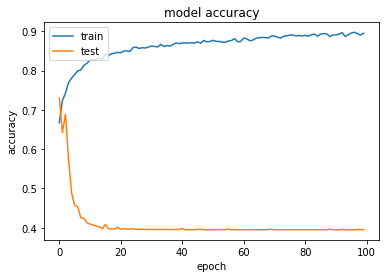

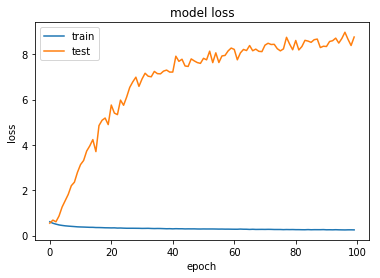

In [23]:
plotHistory(hist0)

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


NameError: name 'seq_length' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plotCorr(x):
    # Compute the correlation matrix
    corr = x.corr()

    # Generate a mask for the upper triangle
    mask = numpy.zeros_like(corr, dtype=numpy.bool)
    mask[numpy.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

In [ ]:
plotCorr(X)

In [ ]:
sns.heatmap(corr>0.3)
plt.show()

In [ ]:
sns.heatmap(corr>0.5)
plt.show()

In [ ]:
set(Y1.target)

In [ ]:
X.head()

In [ ]:
set(Y2.target)

In [ ]:
set(Y3.target)

In [ ]:
corr=X.corr()

In [ ]:
sns.heatmap(corr<-0.3)

In [ ]:
plt.show()